In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\FinalBalancedDataset.csv")
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [3]:
df = df.iloc[:,1:3]

In [4]:
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [5]:
# remove patterns in input text
def remove_patterns(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for words in r:
        input_txt = re.sub(words,"",input_txt)
    return input_txt    

<AxesSubplot:>

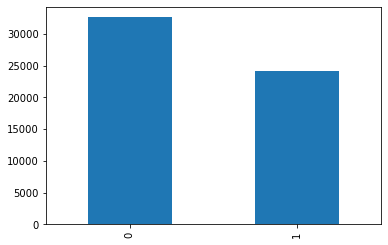

In [6]:
df['Toxicity'].value_counts().plot(kind="bar")

In [7]:
# remove twitter handles @ and all
df['clean_tweet'] = np.vectorize(remove_patterns)(df['tweet'],"@[\w]*")


In [8]:
df.head()

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation


In [9]:
# removing special characters.numbers and punctuation
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide society now #motivation


In [10]:
# removing shorter words with the help of list comprehesion
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : " ".join([words for words in x.split() if len(words)>3]))
df.head()

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguide society #motivation


In [11]:
# Tokenize the tokens individual words
tokenized_tweets = df['clean_tweet'].apply(lambda x : x.split())
tokenized_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [12]:
# Stemming the words (it removes ily ing words like that to make sentence shorter it narrow down the words to their base words like fight, figher ,fighting to fight only)
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [13]:
# combine all the above tokenized tweet into single sentences
for i in range(len(tokenized_tweets)):
   tokenized_tweets[i]=" ".join(tokenized_tweets[i])
df['clean_tweet'] = tokenized_tweets
df.head()               

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,0,bihday your majesty,bihday your majesti
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguid societi #motiv


# Exaploratory Data Analysis

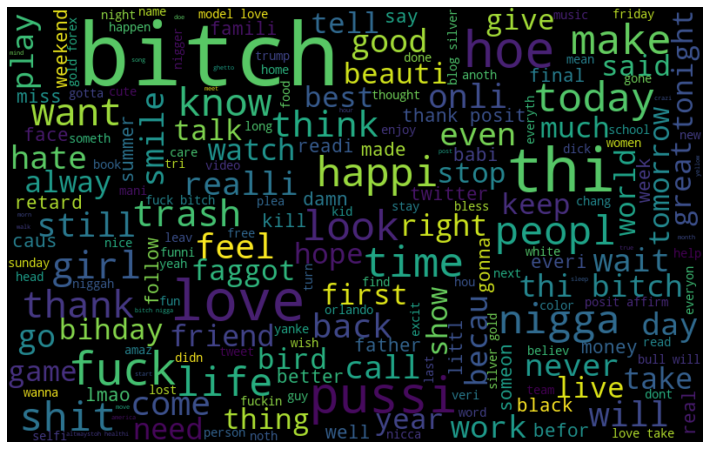

In [14]:
all_words = " ".join(i for i in df["clean_tweet"])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,random_state =42,max_font_size=100).generate(all_words)

# plot the graph with the help of matplotlib
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# from here we can analyse that frequent used words are bitches,bitch,love,pussy,happy,shit,today,fuck,nigga and all

In [15]:
# Frequent words visualization for positve words...

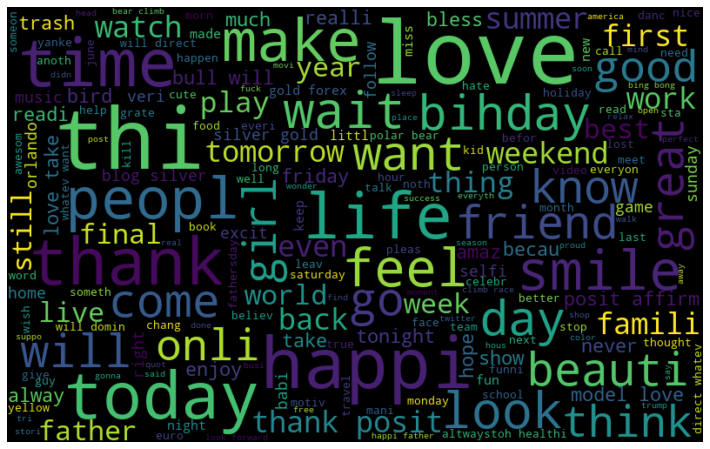

In [16]:
all_words = " ".join([i for i in df["clean_tweet"][df['Toxicity']==0]])

wordcloud = WordCloud(width=800, height=500,random_state =42,max_font_size=100).generate(all_words)

# plot the graph with the help of matplotlib
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Positve words are :- Love, Life,time,make,want ,year,know,girl,people,first,goo,summer,positive ,weekend

In [17]:
# Frequent words visualization for negative words...

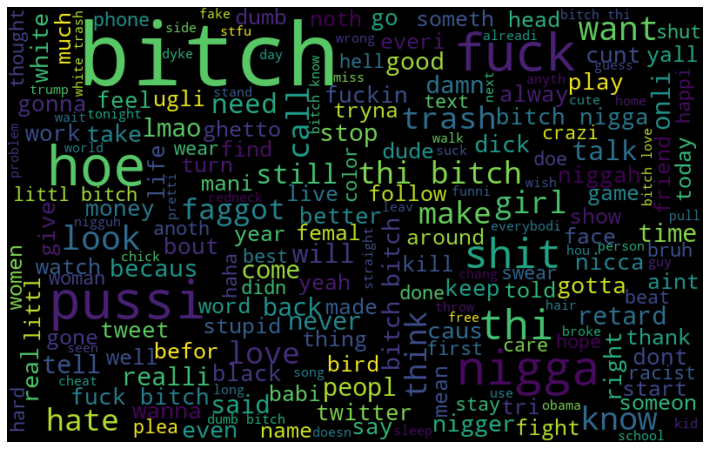

In [18]:
all_words = " ".join([i for i in df["clean_tweet"][df['Toxicity']==1]])

wordcloud = WordCloud(width=800, height=500,random_state =42,max_font_size=100).generate(all_words)

# plot the graph with the help of matplotlib
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Negative words: Bitches,bitch,nigga,hoe,shit,faggot,fuck,hate,money,lamo

In [19]:
# extracting the hastags
def hastags(clean_tweet):
    hashtags=[]
    
    for word in clean_tweet:
        ht = re.findall(r"#(\w+)",word)
        hashtags.append(ht)

    return hashtags    

In [20]:
# for non racsist /sexiest tweets
ht_postive = hastags(df['clean_tweet'][df['Toxicity']==0])

# for racsist /sexiest tweets
ht_negative = hastags(df['clean_tweet'][df['Toxicity']==1])



In [21]:
ht_postive[:5]


[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [22]:
# unnest list
# combine all them into simple list making list of list as list only [[]]-->[]
ht_postive = sum(ht_postive,[])
ht_negative = sum(ht_negative,[])

In [23]:
ht_postive[:10]

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate']

In [24]:
ht_negative[:10]

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump']

In [25]:
freq = nltk.FreqDist(ht_postive)
d = pd.DataFrame({"Hashtags":list(freq.keys()),
                'Counts':list(freq.values())})
d.head()

,Hashtags,Counts
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


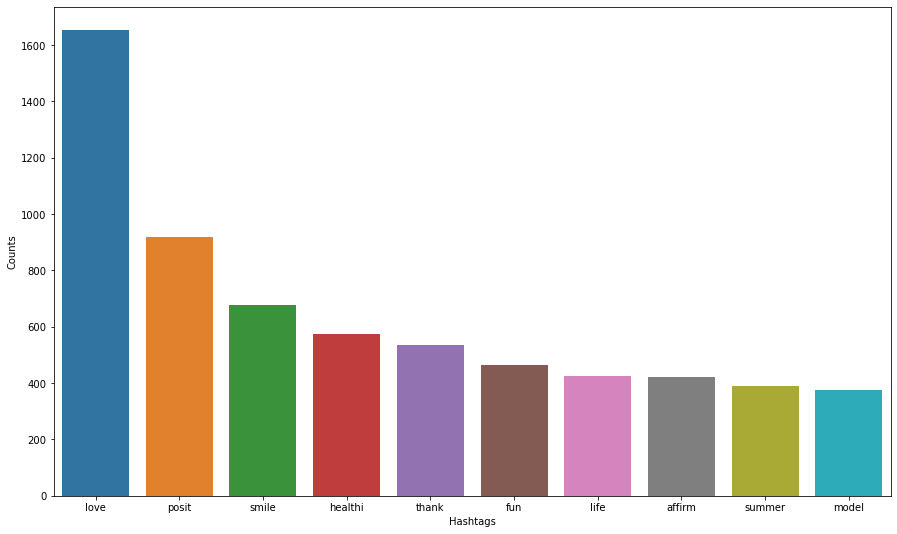

In [26]:
# selecting top 10 hashtags
import seaborn as sns
d = d.nlargest(columns ='Counts',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x="Hashtags",y="Counts")
plt.show()

In [27]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({"Hashtags":list(freq.keys()),
                'Counts':list(freq.values())})
d.head()

,Hashtags,Counts
0,cnn,10
1,michigan,2
2,tcot,45
3,australia,6
4,opkillingbay,5


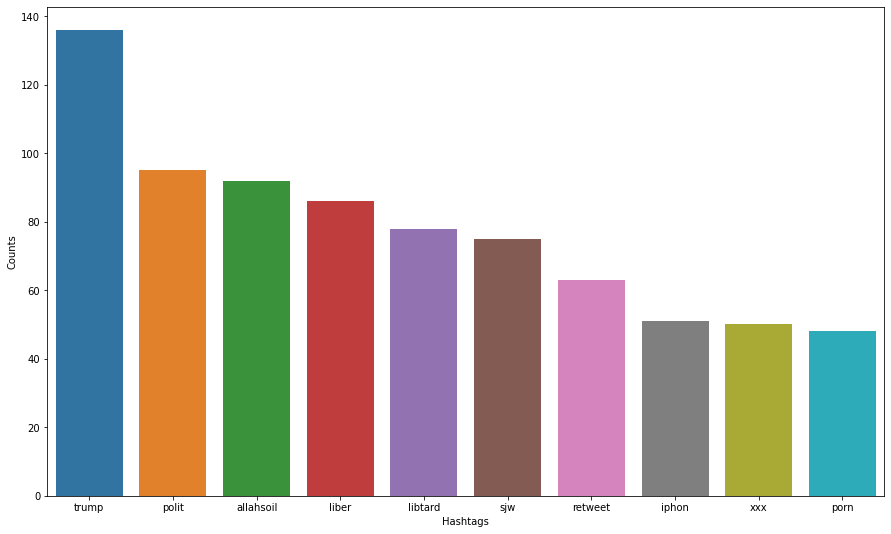

In [28]:
# selecting top 10 hashtags

d = d.nlargest(columns ='Counts',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x="Hashtags",y="Counts")
plt.show()

In [29]:
# bow[0].toarray()
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve , auc

# Input splits and using BOW(Bag of Words)

In [30]:
# Feature selection,extraction
# convert text into numerical vectors for machine to understand

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df = 0.90,min_df=2,max_features =1000,stop_words='english') #hyperparameter tuning
bow = bow_vectorizer.fit_transform(df['clean_tweet'])


In [31]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(bow,df['Toxicity'],random_state=42,test_size=0.25)

# Model training Using Decision Tree

In [32]:
# Training the model over decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)


DecisionTreeClassifier()

<!-- prediction -->

In [33]:
# prediction
y_pred = clf.predict(X_test)

# Metrics for Decision tree

Accuracy:  0.9142172411362515
Precision : 0.9142172411362515
Recall : 0.9142172411362515
F1 Score : 0.9142172411362515
Confusion Matrix:
[[7876  251]
 [ 966 5094]]


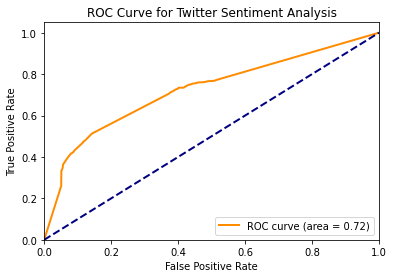

In [80]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# # Diagonal elements shows the correct predictions

# # Calculate the ROC AUC score

# Step 5: Make predictions and obtain sentiment scores
y_scores = clf.predict_proba(X_test)[:, 1]

# Step 6: Calculate the True Positive Rate (TPR) and False Positive Rate (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Step 7: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Twitter Sentiment Analysis')
plt.legend(loc="lower right")
plt.show()

# Splitting and using Tf-IDF Vector

In [35]:
df.head()

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,0,bihday your majesty,bihday your majesti
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguid societi #motiv


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create an instance of the TfidfVectorizer
vectorizer = TfidfVectorizer(max_df = 0.90,min_df=2,max_features =1000,stop_words='english')

# Fit and transform the documents into TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(df['clean_tweet'])
# tfidf_vectors[0].toarray()

In [37]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(tfidf_vectors,df['Toxicity'],random_state=42,test_size=0.25)

Accuracy:  0.8860929019524917
Precision : 0.8860929019524917
Recall : 0.8860929019524917
F1 Score : 0.8860929019524917
Confusion Matrix:
[[7352  775]
 [ 841 5219]]


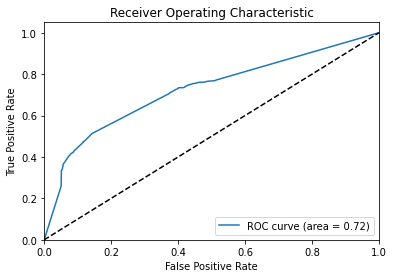

In [38]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Predict probabilities for the testing data
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Model training and Metrics calculation for Random forest

In [39]:
# using bag of words to convert text into numerical vectors
bow_vectorizer = CountVectorizer(max_df = 0.90,min_df=2,max_features =1000,stop_words='english') #hyperparameter tuning
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [40]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(bow,df['Toxicity'],random_state=42,test_size=0.25)

In [41]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()
# Train the classifier
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [42]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

Precision : 0.9051948967364488
Recall : 0.9051948967364488
F1 Score : 0.9051948967364488
Confusion Matrix:
[[7565  562]
 [ 783 5277]]


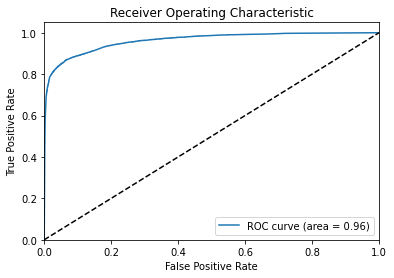

In [43]:
# Calculating metrices

("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Predict probabilities for the testing data
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [44]:
# using TF-IDF to convert text into numerical vectors
# Create an instance of the TfidfVectorizer
vectorizer = TfidfVectorizer(max_df = 0.90,min_df=2,max_features =1000,stop_words='english')

# Fit and transform the documents into TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(df['clean_tweet'])
# tfidf_vectors[0].toarray()

In [45]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(tfidf_vectors,df['Toxicity'],random_state=42,test_size=0.25)

In [46]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()
# Train the classifier
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [47]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

Accuracy:  0.9097765560019736
Precision : 0.9097765560019736
Recall : 0.9097765560019736
F1 Score : 0.9097765560019736
Confusion Matrix:
[[7666  461]
 [ 819 5241]]


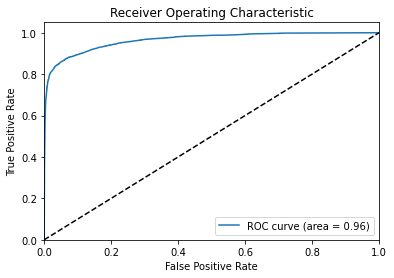

In [48]:
# Calculating metrices

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Predict probabilities for the testing data
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [49]:
df.head()

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,0,bihday your majesty,bihday your majesti
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguid societi #motiv


# Model training and Metrics calculation for Naive Bayes

In [50]:
# using bag of words to convert text into numerical vectors
bow_vectorizer = CountVectorizer(max_df = 0.90,min_df=2,max_features =1000,stop_words='english') #hyperparameter tuning
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [51]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(bow,df['Toxicity'],random_state=42,test_size=0.25)

In [52]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train.toarray(), y_train)



GaussianNB()

In [53]:
# Predict on the test set
y_pred = naive_bayes_classifier.predict(X_test.toarray())

Accuracy:  0.7371537322901247
Precision : 0.7371537322901247
Recall : 0.7371537322901247
F1 Score : 0.7371537322901247
Confusion Matrix:
[[4778 3349]
 [ 380 5680]]


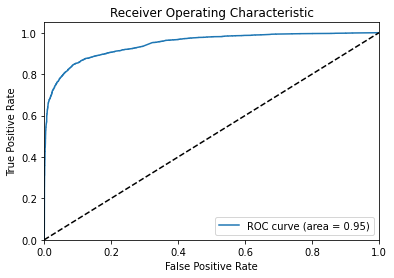

In [54]:
# Calculating metrices

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Predict probabilities for the testing data
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [55]:
# using TF-IDF to convert text into numerical vectors
# Create an instance of the TfidfVectorizer
vectorizer = TfidfVectorizer(max_df = 0.90,min_df=2,max_features =1000,stop_words='english')

# Fit and transform the documents into TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(df['clean_tweet'])
# tfidf_vectors[0].toarray()

In [56]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(tfidf_vectors,df['Toxicity'],random_state=42,test_size=0.25)

In [57]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train.toarray(), y_train)



GaussianNB()

Accuracy:  0.7371537322901247
Precision : 0.7371537322901247
Recall : 0.7371537322901247
F1 Score : 0.7371537322901247
Confusion Matrix:
[[4778 3349]
 [ 380 5680]]


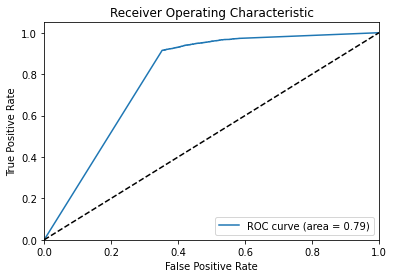

In [58]:
# Calculating metrices

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Predict probabilities for the testing data
y_pred_prob = naive_bayes_classifier.predict_proba(X_test.toarray())[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Model training and Metrics calculation for K-NN Classifier

In [59]:
# using bag of words to convert text into numerical vectors
bow_vectorizer = CountVectorizer(max_df = 0.90,min_df=2,max_features =1000,stop_words='english') #hyperparameter tuning
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [60]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(bow,df['Toxicity'],random_state=42,test_size=0.25)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)



KNeighborsClassifier()

In [62]:
# Predict on the test set
y_pred = knn_classifier.predict(X_test)

Accuracy:  0.878127863537041
Precision : 0.878127863537041
Recall : 0.878127863537041
F1 Score : 0.878127863537041
Confusion Matrix:
[[7570  557]
 [1172 4888]]


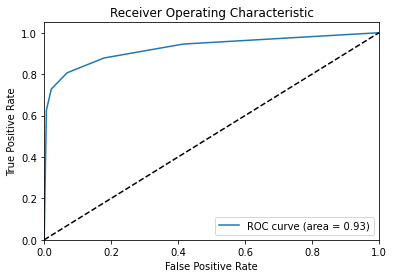

In [63]:
# Calculating metrices

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Predict probabilities for the testing data
y_pred_prob = knn_classifier.predict_proba(X_test.toarray())[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [64]:
# using TF-IDF to convert text into numerical vectors
# Create an instance of the TfidfVectorizer
vectorizer = TfidfVectorizer(max_df = 0.90,min_df=2,max_features =1000,stop_words='english')

# Fit and transform the documents into TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(df['clean_tweet'])
# tfidf_vectors[0].toarray()

In [65]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(tfidf_vectors,df['Toxicity'],random_state=42,test_size=0.25)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)



KNeighborsClassifier()

In [67]:
# Predict on the test set
y_pred = knn_classifier.predict(X_test)

Accuracy:  0.8100373581447804
Precision : 0.8100373581447804
Recall : 0.8100373581447804
F1 Score : 0.8100373581447804
Confusion Matrix:
[[7310  817]
 [1878 4182]]


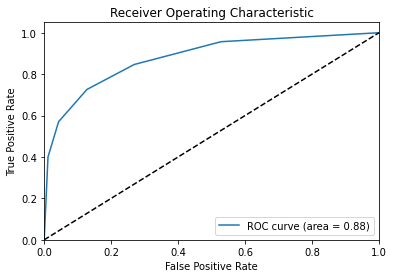

In [68]:
# Calculating metrices

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Predict probabilities for the testing data
y_pred_prob = knn_classifier.predict_proba(X_test.toarray())[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [69]:
df.head()

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,0,bihday your majesty,bihday your majesti
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguid societi #motiv


# Model training and Metrics calculation for SVM Model

In [70]:
# using bag of words to convert text into numerical vectors
bow_vectorizer = CountVectorizer(max_df = 0.90,min_df=2,max_features =1000,stop_words='english') #hyperparameter tuning
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [71]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(bow,df['Toxicity'],random_state=42,test_size=0.25)

In [72]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)



SVC()

In [73]:
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

Accuracy:  0.9112567843800663
Precision : 0.9112567843800663
Recall : 0.9112567843800663
F1 Score : 0.9112567843800663
Confusion Matrix:
[[7900  227]
 [1032 5028]]


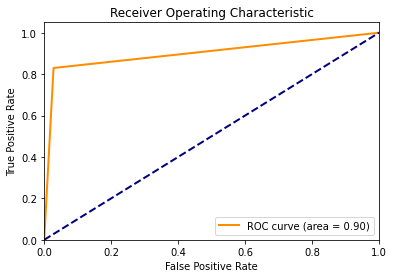

In [74]:
# Calculating metrices

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [75]:
# using TF-IDF to convert text into numerical vectors
# Create an instance of the TfidfVectorizer
vectorizer = TfidfVectorizer(max_df = 0.90,min_df=2,max_features =1000,stop_words='english')

# Fit and transform the documents into TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(df['clean_tweet'])
# tfidf_vectors[0].toarray()

In [76]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(tfidf_vectors,df['Toxicity'],random_state=42,test_size=0.25)

In [77]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)



SVC()

In [78]:
# Predict on the test set
y_pred = svm_classifier.predict(X_test)

Accuracy:  0.9142172411362515
Precision : 0.9142172411362515
Recall : 0.9142172411362515
F1 Score : 0.9142172411362515
Confusion Matrix:
[[7876  251]
 [ 966 5094]]


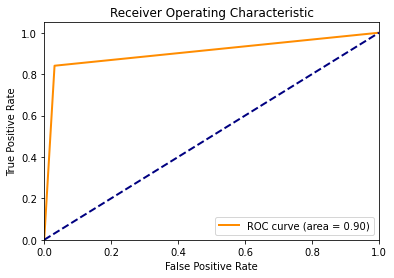

In [79]:
# Calculating metrices

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Overall conclusion Random forest outperform among other models with an Accuracy of - 90.97